<a href="https://colab.research.google.com/github/koushik0416/file/blob/main/data_science_of_instagram_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Byrapuneni Venkata Kowshik**

# 21BDS0165

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import necessary libraries
import pandas as pd
from google.colab import files

# Upload the file
uploaded = files.upload()

# Assuming the uploaded file is in CSV format
file_name = list(uploaded.keys())[0]

# Since the file is an Excel file, use pd.read_excel instead of pd.read_csv
df = pd.read_excel(file_name)

# Display the first few rows of the dataset to verify it loaded correctly
df.head()

Saving instagram data.xlsx to instagram data (1).xlsx


,Post_ID,Date,Likes,Comments,Shares,Impressions,Reach,Saves,Followers_Gained,Followers_Lost
0,Post_1,2023-01-01,7370.0,NaN,119.0,NaN,39556.0,347.0,37.0,29.0
1,Post_2,2023-01-02,960.0,472.0,160.0,16338.0,19688.0,675.0,96.0,30.0
2,Post_3,2023-01-03,5490.0,230.0,151.0,3491.0,NaN,89.0,87.0,NaN
3,Post_4,2023-01-04,5291.0,189.0,115.0,28236.0,18306.0,647.0,78.0,8.0
4,Post_5,2023-01-05,5834.0,224.0,NaN,49096.0,21263.0,697.0,29.0,2.0


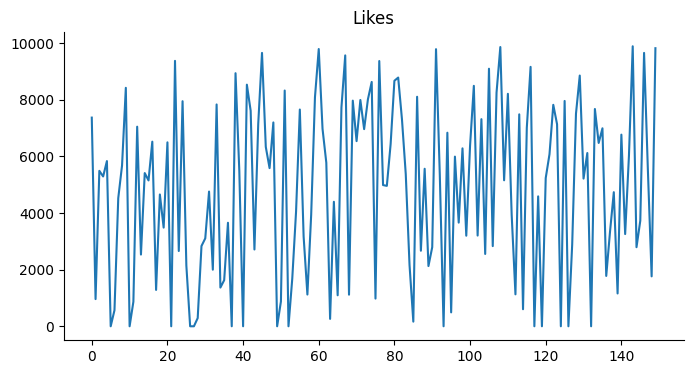

In [ ]:
# @title Likes

from matplotlib import pyplot as plt
df['Likes'].plot(kind='line', figsize=(8, 4), title='Likes')
plt.gca().spines[['top', 'right']].set_visible(False)

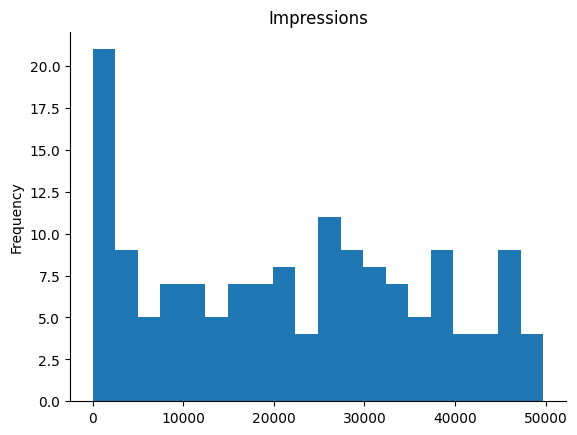

In [ ]:
# @title Impressions

from matplotlib import pyplot as plt
df['Impressions'].plot(kind='hist', bins=20, title='Impressions')
plt.gca().spines[['top', 'right',]].set_visible(False)

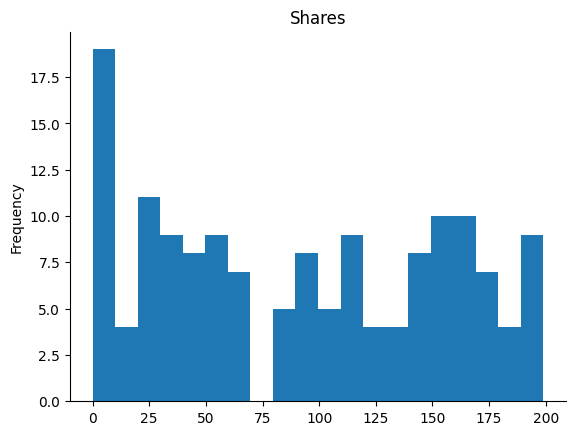

In [ ]:
# @title Shares

from matplotlib import pyplot as plt
df['Shares'].plot(kind='hist', bins=20, title='Shares')
plt.gca().spines[['top', 'right',]].set_visible(False)

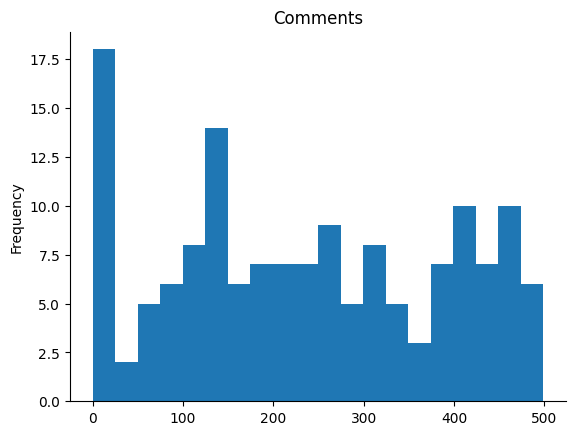

In [ ]:
# @title Comments

from matplotlib import pyplot as plt
df['Comments'].plot(kind='hist', bins=20, title='Comments')
plt.gca().spines[['top', 'right',]].set_visible(False)

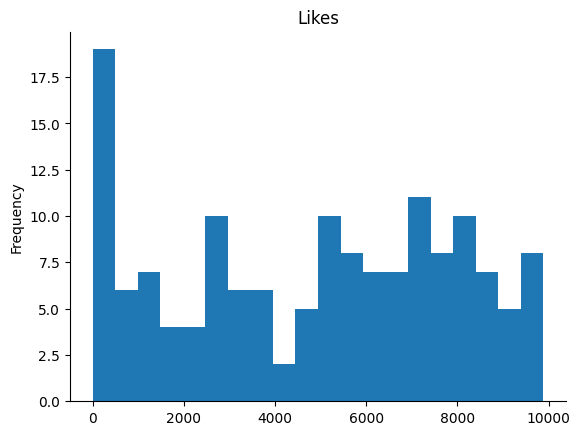

In [ ]:
# @title Likes

from matplotlib import pyplot as plt
df['Likes'].plot(kind='hist', bins=20, title='Likes')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Basic overview
print("Dataset Shape: ", df.shape)
print("\nColumn Names: \n", df.columns)
print("\nData Info: \n")
df.info()

# Summary statistics
print("\nSummary Statistics: \n", df.describe())

# Check for missing values
print("\nMissing Values: \n", df.isnull().sum())

# Handling missing values (if any)
df.fillna(0, inplace=True)  # You can choose a more appropriate strategy based on your data

# Convert 'Date' column to datetime if it's not in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Data Mining/EDA:

# 1. Insights on Engagement (Likes, Comments, Shares)
print("\nTop 5 Posts by Likes:")
top_likes = df[['Post_ID', 'Likes']].sort_values(by='Likes', ascending=False).head()
print(top_likes)

print("\nTop 5 Posts by Comments:")
top_comments = df[['Post_ID', 'Comments']].sort_values(by='Comments', ascending=False).head()
print(top_comments)

print("\nTop 5 Posts by Shares:")
top_shares = df[['Post_ID', 'Shares']].sort_values(by='Shares', ascending=False).head()
print(top_shares)




Dataset Shape:  (150, 10)

Column Names: 
 Index(['Post_ID', 'Date', 'Likes', 'Comments', 'Shares', 'Impressions',
       'Reach', 'Saves', 'Followers_Gained', 'Followers_Lost'],
      dtype='object')

Data Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Post_ID           150 non-null    object        
 1   Date              150 non-null    datetime64[ns]
 2   Likes             150 non-null    float64       
 3   Comments          150 non-null    float64       
 4   Shares            150 non-null    float64       
 5   Impressions       150 non-null    float64       
 6   Reach             150 non-null    float64       
 7   Saves             150 non-null    float64       
 8   Followers_Gained  150 non-null    float64       
 9   Followers_Lost    150 non-null    float64       
dtypes: datetime64[ns](1), float

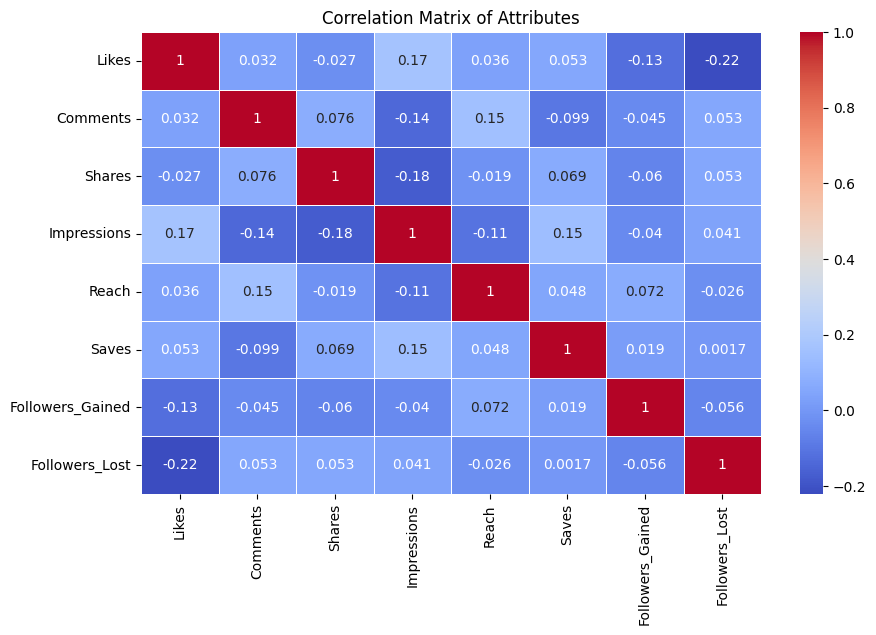

In [ ]:
# 2. Correlation Analysis
numerical_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Attributes')
plt.show()



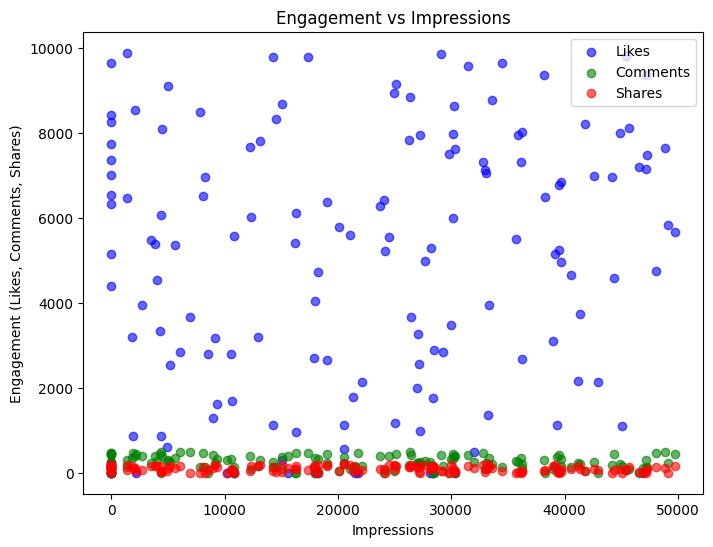

In [ ]:
# 3. Impressions vs Engagement (Likes, Comments, Shares)
plt.figure(figsize=(8, 6))
plt.scatter(df['Impressions'], df['Likes'], alpha=0.6, label='Likes', color='blue')
plt.scatter(df['Impressions'], df['Comments'], alpha=0.6, label='Comments', color='green')
plt.scatter(df['Impressions'], df['Shares'], alpha=0.6, label='Shares', color='red')
plt.title('Engagement vs Impressions')
plt.xlabel('Impressions')
plt.ylabel('Engagement (Likes, Comments, Shares)')
plt.legend()
plt.show()



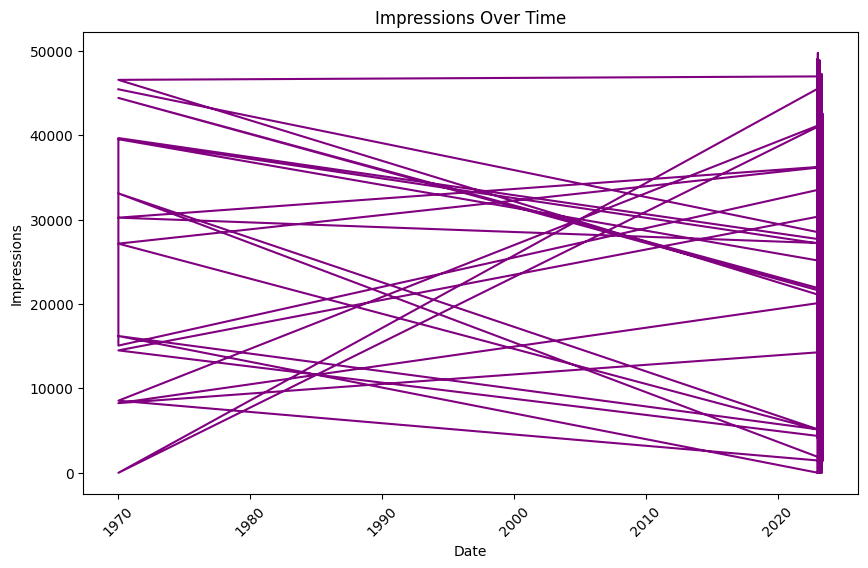

In [ ]:
# 4. Time-based analysis (Impressions over Time)
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Impressions'], label='Impressions', color='purple')
plt.title('Impressions Over Time')
plt.xlabel('Date')
plt.ylabel('Impressions')
plt.xticks(rotation=45)
plt.show()



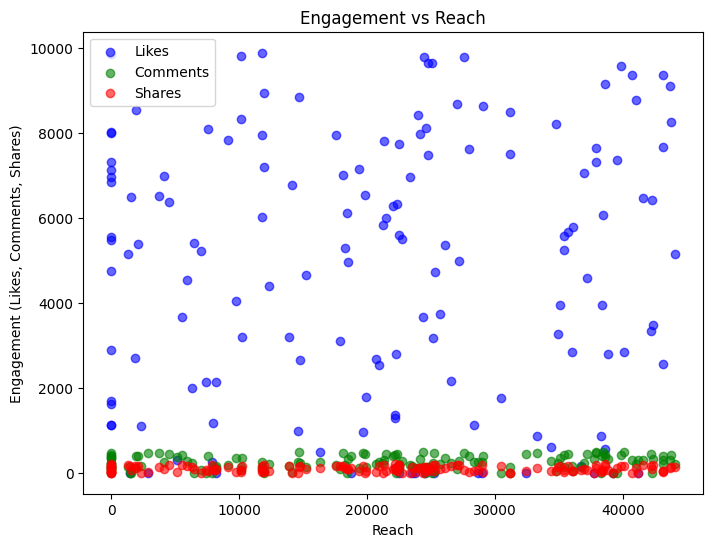

In [ ]:
# 5. Reach vs Engagement
plt.figure(figsize=(8, 6))
plt.scatter(df['Reach'], df['Likes'], alpha=0.6, label='Likes', color='blue')
plt.scatter(df['Reach'], df['Comments'], alpha=0.6, label='Comments', color='green')
plt.scatter(df['Reach'], df['Shares'], alpha=0.6, label='Shares', color='red')
plt.title('Engagement vs Reach')
plt.xlabel('Reach')
plt.ylabel('Engagement (Likes, Comments, Shares)')
plt.legend()
plt.show()



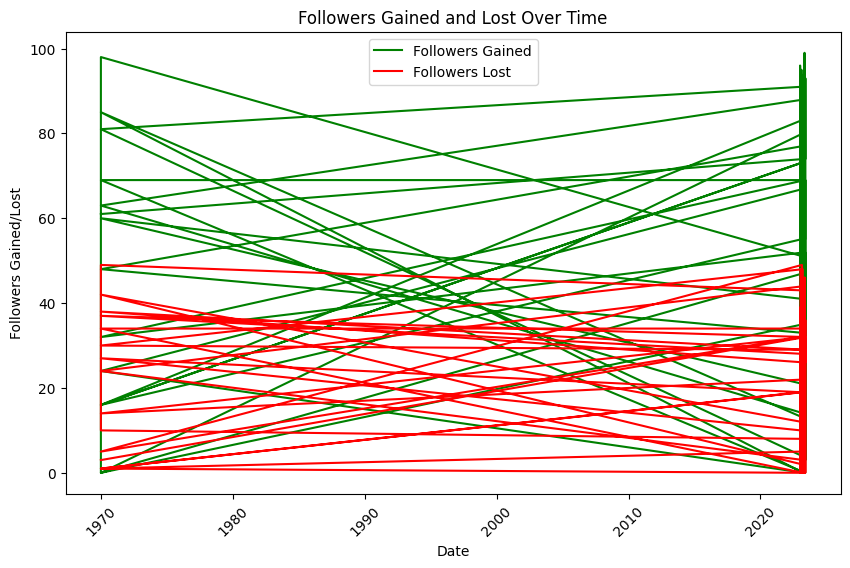

In [ ]:
# 6. Followers Gained and Lost Analysis
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Followers_Gained'], label='Followers Gained', color='green')
plt.plot(df['Date'], df['Followers_Lost'], label='Followers Lost', color='red')
plt.title('Followers Gained and Lost Over Time')
plt.xlabel('Date')
plt.ylabel('Followers Gained/Lost')
plt.legend()
plt.xticks(rotation=45)
plt.show()



In [ ]:
# 7. Posts with the highest saves
top_saves = df[['Post_ID', 'Saves']].sort_values(by='Saves', ascending=False).head()
print("\nTop 5 Posts by Saves:")
print(top_saves)


Top 5 Posts by Saves:
      Post_ID  Saves
79    Post_80  996.0
148  Post_149  993.0
118  Post_119  989.0
71    Post_72  976.0
114  Post_115  960.0
